<a href="https://colab.research.google.com/github/Brun0oO/Colab/blob/main/fastapi_colab_ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Required python library**

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn python-multipart qrcode

# **Simple FastAPI Server**

The following code launches a fastapi server delevering RESTful APIs available through a ngrok tunnel. 

Public URL: http://5c5cc0556980.ngrok.io


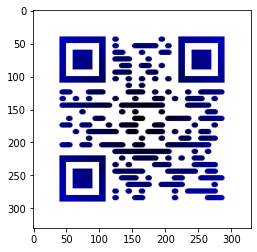

In [ ]:

from fastapi import FastAPI, UploadFile, File, Form, HTTPException
from fastapi.responses import HTMLResponse, RedirectResponse


import nest_asyncio
from pyngrok import ngrok
import uvicorn
import io

import pathlib
from PIL import Image

import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import HorizontalBarsDrawer
from qrcode.image.styles.colormasks import RadialGradiantColorMask

import matplotlib.pyplot as plt
from time import sleep

def createQRCode(text):
  qr = qrcode.QRCode(
      version=1,
      error_correction=qrcode.constants.ERROR_CORRECT_L,
      box_size=10,
      border=4,
  )
  qr.add_data(text)

  result = qr.make_image(image_factory=StyledPilImage, module_drawer=HorizontalBarsDrawer(), color_mask=RadialGradiantColorMask())

  return result


def processImage(img):
  result = [img.width, img.height]
  return result

app = FastAPI()

@app.get('/', response_class=HTMLResponse)
async def home():
  result = """
<h1>FastAPI with Colab is great!</h1>
<br>
<p>Some useful links:</p>
<ul>
  <li><a href="%s/docs">automatic interactive API documentation</a></li>
</ul>
  """ % (ngrok_tunnel.public_url)
  return result

@app.post("/analyze/")
async def analyze(image: UploadFile = File(...)):
  extension = pathlib.Path(image.filename).suffix.lower()
  if not(extension in ['.png', '.jpg', '.jpeg']):
    raise HTTPException(status_code=400, detail="bad parameter, waiting for a .png or .jpg filename !")

  contents = await image.read()
  img = Image.open(io.BytesIO(contents))
  result = processImage(img)
  return {'msg': 'success', 'result': result}


@app.get("/ping")
async def ping():
  return { 'msg': 'success', 'result': 'pong'}

@app.get("/docs")
async def docs_redirect():
  response = RedirectResponse(url='/docs')
  return response



ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
qrcode = createQRCode(ngrok_tunnel.public_url)
plt.imshow(qrcode)
plt.show()
sleep(0.5)
nest_asyncio.apply()
uvicorn.run(app, port=8000)